# Import of the Data files and basic Libraries

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np 

# import matplot
import matplotlib.pyplot as plt 

# import seaborn
import seaborn as sns

# other imports will be made when needed later in the code

In [2]:
HD = pd.read_csv('HeartDisease.csv', sep=',')

# Inspecting the Dataset

In [3]:
HD.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  class     297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [5]:
print('The shape of the Dataset is: ', HD.shape)

The shape of the Dataset is:  (297, 14)


In [6]:
HD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
corr_matrix = HD.corr()
corr_matrix.style.background_gradient(cmap='YlOrRd')
# 'RdBu_r', 'BrBG_r', 'PuOr_r', 'coolwarm' are other good diverging colormaps

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


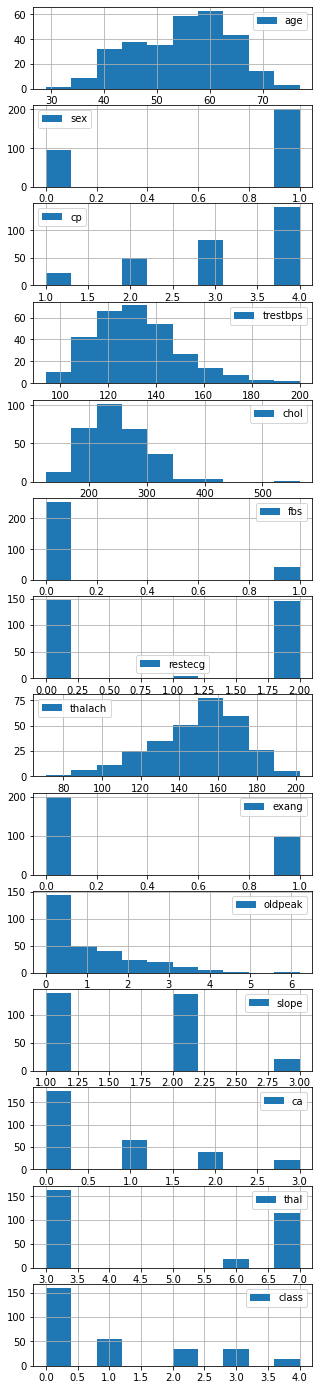

In [8]:
fig, axs = plt.subplots(len(HD.columns), figsize=(5, 25))
for n, col in enumerate(HD.columns):
    HD[col].hist(ax=axs[n], legend=True)

<AxesSubplot:ylabel='Frequency'>

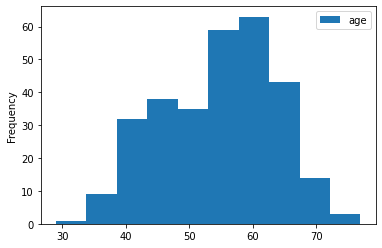

In [9]:
HD['age'].plot(kind='hist', legend='age')

<AxesSubplot:ylabel='Frequency'>

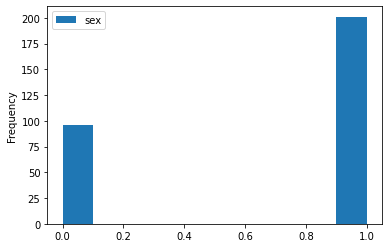

In [10]:
HD['sex'].plot(kind='hist', legend='sex')

<AxesSubplot:ylabel='Frequency'>

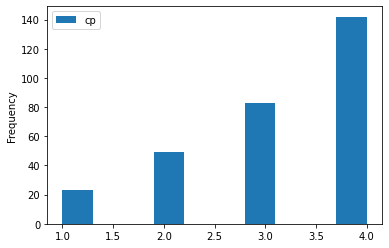

In [11]:
HD['cp'].plot(kind='hist', legend='cp')

<AxesSubplot:ylabel='Frequency'>

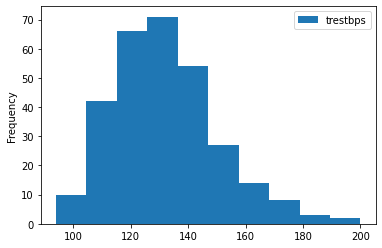

In [12]:
HD['trestbps'].plot(kind='hist', legend='trestbps')

<AxesSubplot:ylabel='Frequency'>

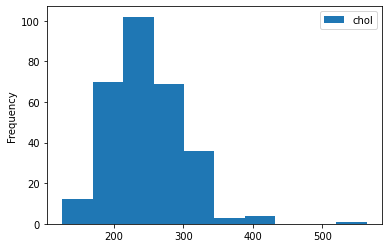

In [13]:
HD['chol'].plot(kind='hist', legend='chol')

<AxesSubplot:ylabel='Frequency'>

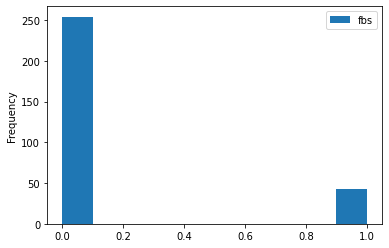

In [14]:
HD['fbs'].plot(kind='hist', legend='fbs')

<AxesSubplot:ylabel='Frequency'>

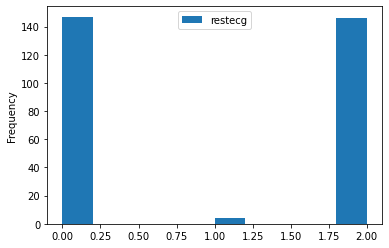

In [15]:
HD['restecg'].plot(kind='hist', legend='restecg')

<AxesSubplot:ylabel='Frequency'>

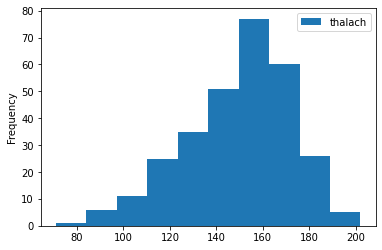

In [16]:
HD['thalach'].plot(kind='hist', legend='thalach')

<AxesSubplot:ylabel='Frequency'>

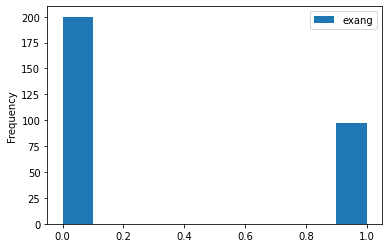

In [17]:
HD['exang'].plot(kind='hist', legend='exang')

<AxesSubplot:ylabel='Frequency'>

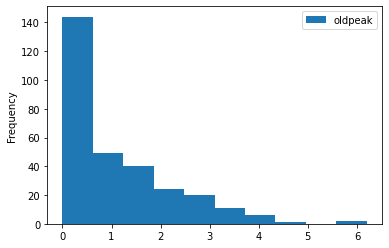

In [18]:
HD['oldpeak'].plot(kind='hist', legend='oldpeak')

<AxesSubplot:ylabel='Frequency'>

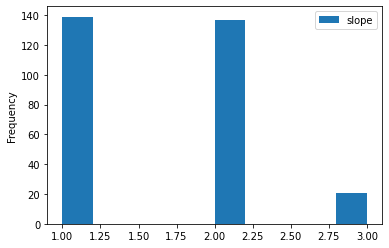

In [19]:
HD['slope'].plot(kind='hist', legend='slope')

<AxesSubplot:ylabel='Frequency'>

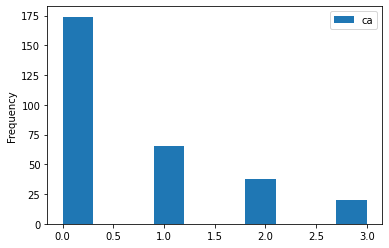

In [20]:
HD['ca'].plot(kind='hist', legend='ca')

<AxesSubplot:ylabel='Frequency'>

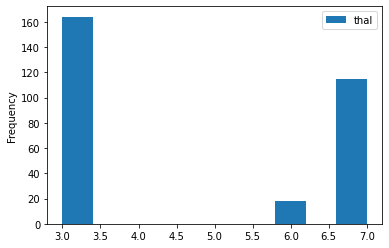

In [21]:
HD['thal'].plot(kind='hist', legend='thal')

<AxesSubplot:ylabel='Frequency'>

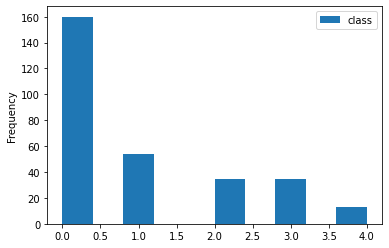

In [23]:
HD['class'].plot(kind='hist', legend='class')

# Normalize the Dataset

In [25]:
# when using decision trees, no Normalization is needed

# Split the Dataset in Multiclass and Binary

In [26]:
HD["class binary"] = np.where(HD["class"] > 0, 1, 0)
HD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [27]:
HD_multi = HD.drop('class binary', axis=1)
HD_multi.rename(columns={'class': 'class multi'}, inplace=True)
HD_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class multi
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [28]:
HD_binary = HD.drop('class', axis=1)
HD_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Define X & Y

In [29]:
# We define the x Table and y Table
    #x Table contains all features (without the outcome)
    #y Table only contains the Outcome
x_multi = HD_multi.drop('class multi', axis=1)       # features
y_multi = HD_multi['class multi']                    # labels

In [30]:
x_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [31]:
y_multi.head()

0    0
1    2
2    1
3    0
4    0
Name: class multi, dtype: int64

In [32]:
# We define the x Table and y Table
    #x Table contains all features (without the outcome)
    #y Table only contains the Outcome
x_binary = HD_binary.drop('class binary', axis=1)       # features
y_binary = HD_binary['class binary']                    # labels

In [33]:
x_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [34]:
y_binary.head()

0    0
1    1
2    1
3    0
4    0
Name: class binary, dtype: int32

# Analysis of the different classes

c:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class multi', ylabel='count'>

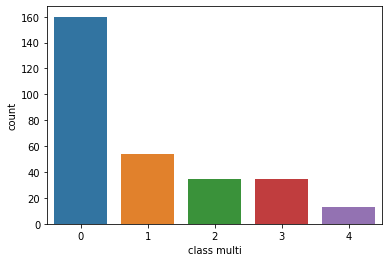

In [39]:
sns.countplot(y_multi)

In [40]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==0])/len(y_multi)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==1])/len(y_multi)*100), '%')
print('The percentage of 2 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==2])/len(y_multi)*100), '%')
print('The percentage of 3 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==3])/len(y_multi)*100), '%')
print('The percentage of 4 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==4])/len(y_multi)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 18.18 %
The percentage of 2 is: 11.78 %
The percentage of 3 is: 11.78 %
The percentage of 4 is: 4.38 %


c:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class binary', ylabel='count'>

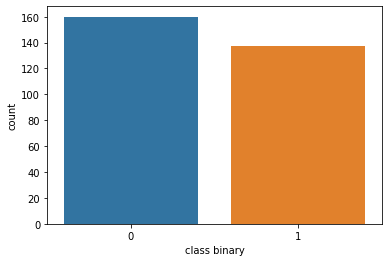

In [41]:
sns.countplot(y_binary)

In [46]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==0])/len(y_binary)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==1])/len(y_binary)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 46.13 %


# Split the Dataset into Train-Validation-Test
#### Multi

In [62]:
from sklearn.model_selection import train_test_split

# First we split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(x_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi)

#Secondly we split in Train & Validation
# random_state means the code will always have the same training set (in order to reproduce results)

x_multi_train_val, x_multi_validation, y_multi_train_val, y_multi_validation = train_test_split(x_multi_train, y_multi_train, test_size=(0.2/0.7), random_state=42, stratify=y_multi_train)

In [63]:
#Quick check if the split is correct:
print("Shape of x_multi_train             : "+str(x_multi_train.shape))
print("Shape of x_multi_test              : "+str(x_multi_test.shape))
print("Shape of y_multi_train             : "+str(y_multi_train.shape))
print("Shape of y_multi_test              : "+str(y_multi_test.shape))
print('')
print("Lenght of Dataset                  : ", len(x_multi))
print("Percentage of Train_multi          : ", '{:.2f}'.format(len(x_multi_train)/len(x_multi)*100), '%')
print("Percentage of Test_multi           : ", '{:.2f}'.format(len(x_multi_test)/len(x_multi)*100), '%')

print("Percentage of x_multi_train_val    : ", '{:.2f}'.format(len(x_multi_train_val)/len(x_multi)*100), '%')
print("Percentage of Validation_multi     : ", '{:.2f}'.format(len(x_multi_validation)/len(x_multi)*100), '%')


Shape of x_multi_train             : (207, 13)
Shape of x_multi_test              : (90, 13)
Shape of y_multi_train             : (207,)
Shape of y_multi_test              : (90,)

Lenght of Dataset                  :  297
Percentage of Train_multi          :  69.70 %
Percentage of Test_multi           :  30.30 %
Percentage of x_multi_train_val    :  49.49 %
Percentage of Validation_multi     :  20.20 %


# Split the Dataset into Train-Validation-Test
#### Binary

In [58]:
from sklearn.model_selection import train_test_split

# First we split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
x_binary_train, x_binary_test, y_binary_train, y_binary_test = train_test_split(x_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

#Secondly we split in Train & Validation
# random_state means the code will always have the same training set (in order to reproduce results)

x_binary_train_val, x_binary_validation, y_binary_train_val, y_binary_validation = train_test_split(x_binary_train, y_binary_train, test_size=(0.2/0.7), random_state=42)

In [59]:
#Quick check if the split is correct:
print("Shape of x_binary_train             : "+str(x_binary_train.shape))
print("Shape of x_binary_test              : "+str(x_binary_test.shape))
print("Shape of y_binary_train             : "+str(y_binary_train.shape))
print("Shape of y_binary_test              : "+str(y_binary_test.shape))
print('')
print("Lenght of Dataset                   : ", len(x_binary))
print("Percentage of Train_binary          : ", '{:.2f}'.format(len(x_binary_train)/len(x_binary)*100), '%')
print("Percentage of Test_binary           : ", '{:.2f}'.format(len(x_binary_test)/len(x_binary)*100), '%')

print("Percentage of x_binary_train_val    : ", '{:.2f}'.format(len(x_binary_train_val)/len(x_binary)*100), '%')
print("Percentage of Validation_binary     : ", '{:.2f}'.format(len(x_binary_validation)/len(x_binary)*100), '%')


Shape of x_binary_train             : (207, 13)
Shape of x_binary_test              : (90, 13)
Shape of y_binary_train             : (207,)
Shape of y_binary_test              : (90,)

Lenght of Dataset                   :  297
Percentage of Train_binary          :  69.70 %
Percentage of Test_binary           :  30.30 %
Percentage of x_binary_train_val    :  49.49 %
Percentage of Validation_binary     :  20.20 %


# Inspecting the Sample Datesets

# Implementing the Model

1. Decision Tree mit Regression (Binär): 

        a) Basic Decision Tree -> Train & Test + Max Debth = 3
    
        b) Decision Tree mit Cross Validation (KFold: Max Debth und Hyperparameter Tuning)
2. Decision Tree mit Classifier (1-4 Classes):

        a) Basic Decision Tree -> Train & Test + Max Debth = 3

        b) Decision Tree mit Cross Validation (Max Debth und Hyperparameter Tuning)
3. Random Forest mit Regression (Binär):

4. Random Forest mit Classifier:

Results:
- Accurary in Sample
- Accuracy out of Sample
- Precision Score
- Recall Score
- F1 Score
- TP
- TN
- FP
- FN

In [67]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Decision tree classifier implementation of scikit-learn
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

In [ ]:
features_names_multi = x_multi.columns
classes_multi = y_multi.unique()

plot_tree(dt_credit, filled = True, rounded = True, feature_names = feature_names)

In [77]:
classes_multi = y_multi.unique()
classes_multi

array([0, 2, 1, 3, 4], dtype=int64)

Definition of Results Set:

In [51]:
Results = []

In [52]:
# Decision tree classifier implementation of scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Define the tree classifier
tree_multi = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=2)

# Train tree classifier on the training set
tree_multi.fit(x_multi_train, y_multi_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

In [53]:
print("Accuracy on the training set: {:.3f}".format(tree_multi.score(x_multi_train, y_multi_train)))
print("Accuracy on the test set: {:.3f}".format(tree_multi.score(x_multi_test, y_multi_test)))

Accuracy on the training set: 0.628
Accuracy on the test set: 0.522


In [54]:
# Accurary in Sample
tree_multi.score(x_multi_train, y_multi_train)

0.6280193236714976

In [55]:
# Accuracy out of Sample
tree_multi.score(x_multi_test, y_multi_test)

0.5222222222222223

In [ ]:
# Precision Score


In [ ]:
# Recall Score


In [ ]:
# F1 Score


In [ ]:
# TP


In [ ]:
# TN


In [ ]:
# FP


In [ ]:
# FN

In [67]:
# Import relevant packages
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0)
rf.fit(X_train, Y_train)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
predicted = rf.predict(x_multi_test)

In [ ]:
predicted_results = pd.DataFrame(predicted)

predicted_results

In [ ]:
accuracy_score(y_multi_train, predicted_results)

[Text(167.4, 190.26, 'X[11] <= 0.5\nentropy = 1.866\nsamples = 207\nvalue = [111, 37, 25, 24, 10]'),
 Text(83.7, 135.9, 'X[12] <= 6.5\nentropy = 1.166\nsamples = 119\nvalue = [91, 16, 4, 6, 2]'),
 Text(41.85, 81.53999999999999, 'X[7] <= 147.5\nentropy = 0.621\nsamples = 86\nvalue = [76, 7, 3, 0, 0]'),
 Text(20.925, 27.180000000000007, 'entropy = 1.118\nsamples = 22\nvalue = [16, 3, 3, 0, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.337\nsamples = 64\nvalue = [60, 4, 0, 0, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[9] <= 1.95\nentropy = 1.873\nsamples = 33\nvalue = [15, 9, 1, 6, 2]'),
 Text(104.625, 27.180000000000007, 'entropy = 1.352\nsamples = 27\nvalue = [15, 9, 0, 3, 0]'),
 Text(146.475, 27.180000000000007, 'entropy = 1.459\nsamples = 6\nvalue = [0, 0, 1, 3, 2]'),
 Text(251.10000000000002, 135.9, 'X[9] <= 0.9\nentropy = 2.255\nsamples = 88\nvalue = [20, 21, 21, 18, 8]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 3.5\nentropy = 1.955\nsamples = 39\nval

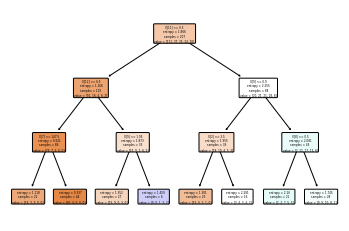

In [48]:
from sklearn.tree import plot_tree
plot_tree(tree_multi, filled = True, rounded = True)

In [49]:
# Out-of-sample 
y_pred = tree_multi.predict(x_multi_test)

In [50]:
# confusion_matrix
from sklearn.metrics import confusion_matrix

In [51]:
# Out-of-Sample Confusion Matrix
cm_credit = confusion_matrix(y_test, y_pred)
cm_credit

NameError: name 'y_test' is not defined

In [ ]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

In [ ]:
plot_decision_boundary(dt_model, X, y)

In [52]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(dt_model, x_test, y_test,cmap=plt.cm.Blues)

NameError: name 'dt_model' is not defined

In [53]:
# With cross validation
from sklearn.model_selection import cross_validate, KFold
from 

SyntaxError: invalid syntax (<ipython-input-53-a27a243ebfe4>, line 3)

In [54]:
# Define lists for the accuracies
cv_acc_list = []
cv_tpr_list = []
cv_acc_in_list = []
cv_tpr_in_list = []

In [59]:
for depth in range(1,21):
    # model
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    # 10-Fold cross validation on whole dataset
    cv_results = cross_validate(clf, x_binary, y_binary,
                                cv = KFold(n_splits = 10, shuffle = True, random_state = 31),
                                scoring = ['accuracy', 'recall'], return_train_score = True)
    # Scores in lists
    cv_acc_list.append(cv_results['test_accuracy'].mean())
    cv_tpr_list.append(cv_results['test_recall'].mean())
    cv_acc_in_list.append(cv_results['train_accuracy'].mean())
    cv_tpr_in_list.append(cv_results['train_recall'].mean())

In [65]:
for depth in range(1,21):
    # model
    clf = DecisionTreeRegressor(criterion='friedman_mse', max_depth = depth)
    # 10-Fold cross validation on whole dataset
    cv_results = cross_validate(clf, x_multi, y_multi,
                                cv = KFold(n_splits = 10, shuffle = True, random_state = 31),
                                scoring = ['accuracy', 'recall'], return_train_score = True)
    # Scores in lists
    cv_acc_list.append(cv_results['test_accuracy'].mean())
    cv_tpr_list.append(cv_results['test_recall'].mean())
    cv_acc_in_list.append(cv_results['train_accuracy'].mean())
    cv_tpr_in_list.append(cv_results['train_recall'].mean())

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

# Recall and Precision Scores for each scenario and classifier

In [ ]:
# True Positive Rate (=recall_score)
from sklearn.metrics import recall_score

In [ ]:
# Out-of-Sample TPR
recall_score(y_test, y_pred)